# ARIMA Models

## Initialization

### Importing Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra and other mathemtical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller # for testing stationarity
from statsmodels.tsa.arima_process import arma_generate_sample # for generating ARMA data
from statsmodels.tsa.arima.model import ARIMA # for fitting ARMA models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for plotting ACF and PACF
from statsmodels.tsa.seasonal import seasonal_decompose # for decomposing time series
from statsmodels.tsa.statespace.sarimax import SARIMAX # for fitting SARIMA models
import pmdarima as pm # for fitting ARIMA models

# custom functions
import basic.basic_functions as bf # for setting up the notebook

import warnings
warnings.filterwarnings('ignore')

### Connecting to Drive

In [3]:
base_folder,data,archive,output = bf.set_folders()

Not Running on Colab and no project specified
Base Folder is C:\Users\abdul\OneDrive\Documents\MSBA
Data Folder is C:\Users\abdul\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\abdul\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\abdul\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/abdul/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\abdul\OneDrive\Documents\MSBA\notebooks\Time_Series_Analysis


#### Importing Datasets

In [4]:
# Importing the dataset
candy = pd.read_csv(data/'candy_production.csv', index_col='date', parse_dates=True)
earthquakes = pd.read_csv(data/'earthquakes.csv', index_col='date', parse_dates=True).drop('Year', axis=1)
amazon = pd.read_csv(data/'amazon_close.csv', index_col='date', parse_dates=True)
milk_production = pd.read_csv(data/'milk_production.csv', index_col='date', parse_dates=True)


## Data Processing

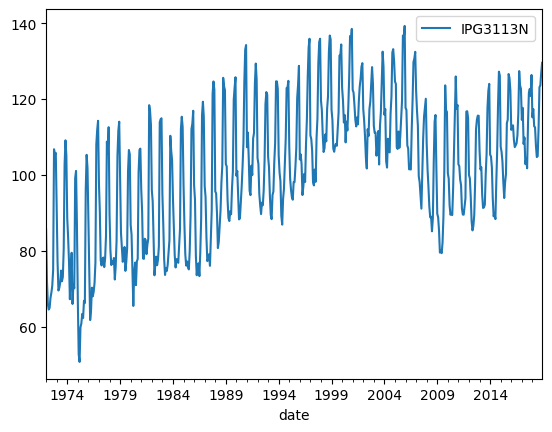

In [5]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

As we can see from the graph the timeseries is not stationary as it exhibits as upward trend increasing over the years

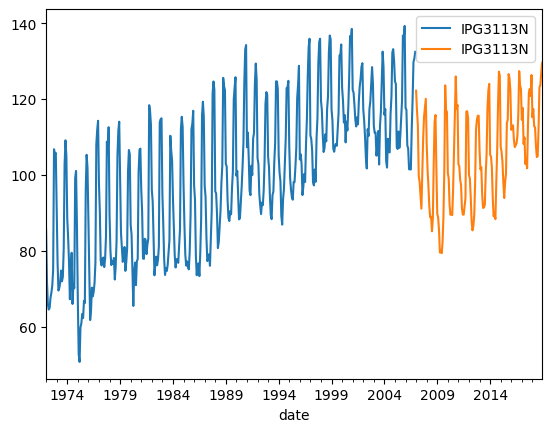

In [6]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006-12-31']
candy_test = candy.loc['2007-01-01':]

# Create an axis
fig, ax = plt.subplots()
# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

### Augmented Dickey-Fuller test

The augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. 

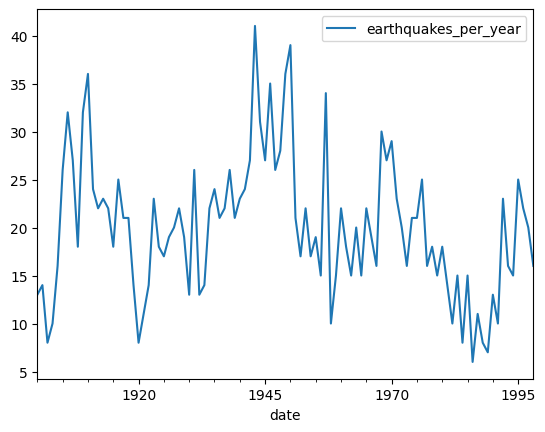

In [7]:
# Plot the time serie
earthquakes.plot()
plt.show()

In [8]:
results = adfuller(earthquakes['earthquakes_per_year'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('%s: %.3f' % (key, value))

print('\n')
print('The p-value is less than 0.05, so the data is stationary')

ADF Statistic: -3.183192
p-value: 0.020978
Critical Values:
1%: -3.500
5%: -2.892
10%: -2.583


The p-value is less than 0.05, so the data is stationary


ADF Statistic: -7.203579
p-value: 0.000000
Critical Values:
1%: -3.436
5%: -2.864
10%: -2.568


The p-value is less than 0.05, so the data is stationary


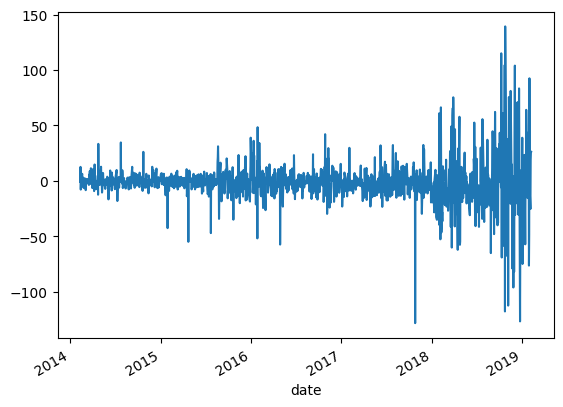

In [9]:
# Adfuller test after first difference
results = adfuller(amazon['close'].diff().dropna())
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('%s: %.3f' % (key, value))

print('\n')
print('The p-value is less than 0.05, so the data is stationary')

# Plot the time series
amazon['close'].diff().dropna().plot()
plt.show()

ADF Statistic: -0.773978
p-value: 0.826647
Critical Values:
1%: -3.436
5%: -2.864
10%: -2.568


The p-value is greater than 0.05, so the data is non-stationary


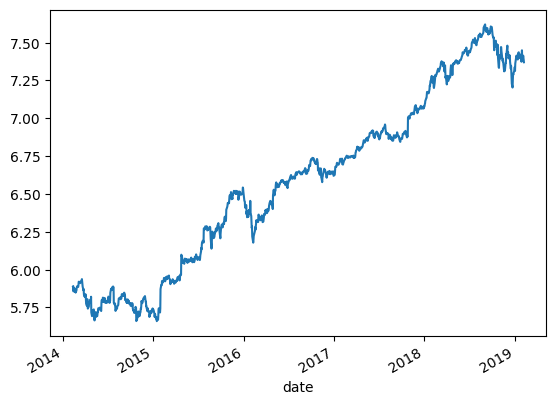

In [10]:
#Adfuller test after log transformation
results = adfuller(np.log(amazon['close']))
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('%s: %.3f' % (key, value))

print('\n')
print('The p-value is greater than 0.05, so the data is non-stationary')

# Plot the time series
np.log(amazon['close']).plot()
plt.show()

### Reading Equations and Parameters

These are examples of equations and how the code would look for these models 

1. An MA(1) model with MA lag-1 coefficient equal to -0.7 

$$\begin{align} y_t &= \epsilon_t + 0.7\epsilon_{t-1} \\ \epsilon_t &\sim N(0,100) \end{align}$$

2. An AR(2) model with an AR lag-1 and lag-2 coefficients equal to 0.3 and 0.2 respectively

$$\begin{align} y_t &= \epsilon_t + 0.3\epsilon_{t-1} + 0.2\epsilon_{t-2} \\ \epsilon_t &\sim N(0,100) \end{align}$$

3. An MA(2) model with a MA lag-1 and lag-2 coefficients equal to 0.3 and 0.4 and AR lag-1 coefficient equal to 0.2 

$$\begin{align} y_t &= \epsilon_t + 0.3\epsilon_{t-1} + 0.4\epsilon_{t-2} + 0.2y_{t-1} \\ \epsilon_t &\sim N(0,100) \end{align}$$

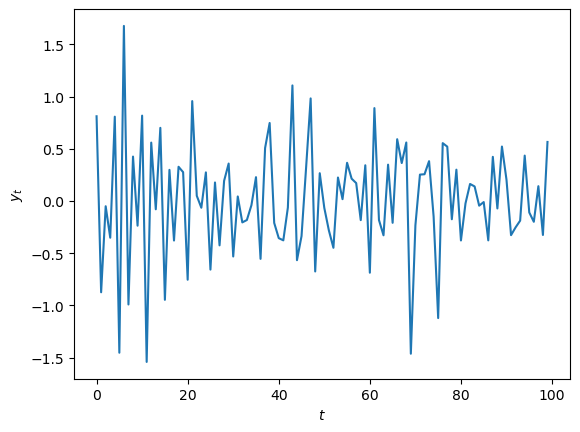

In [35]:
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

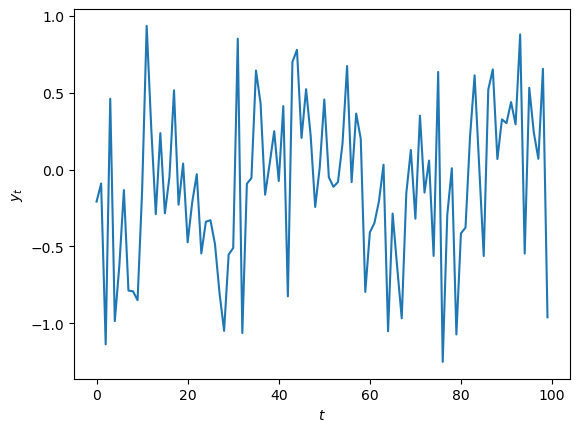

In [36]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

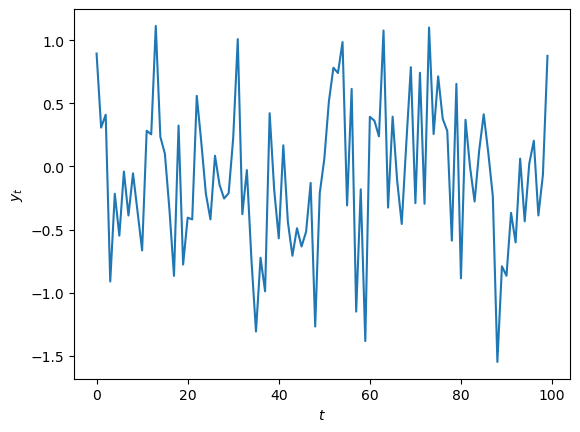

In [37]:
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### ARMAX Model

ARMAX models are a combination of AR and MA models with an exogenous variable. The exogenous variable is a variable that is not dependent on the previous values of the timeseries but may effect dependent variable. An example can be performance during the day and hours of rest we got the previous night. The performance is dependent on the hours of rest but the hours of rest is not dependent on the performance.

In [38]:
# Instantiate the model
model = ARIMA(earthquakes, order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Thu, 20 Apr 2023   AIC                            643.345
Time:                          00:38:22   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

In [39]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower earthquakes_per_year']
upper_limits = confidence_intervals.loc[:,'upper earthquakes_per_year']

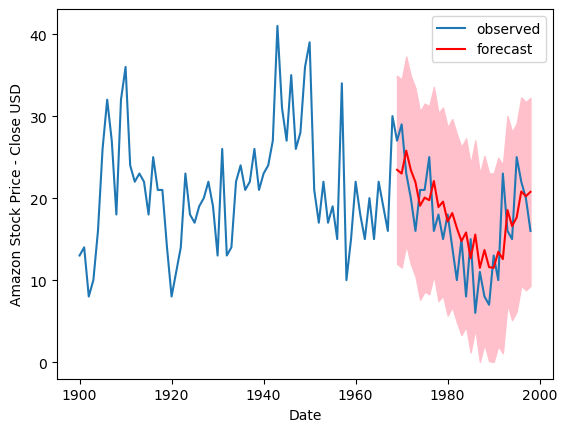

In [40]:
 # plot the amazon data
plt.plot(earthquakes.index, earthquakes, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [41]:
# Generate predictions
dynamic = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = dynamic.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower earthquakes_per_year']
upper_limits = confidence_intervals.loc[:,'upper earthquakes_per_year']

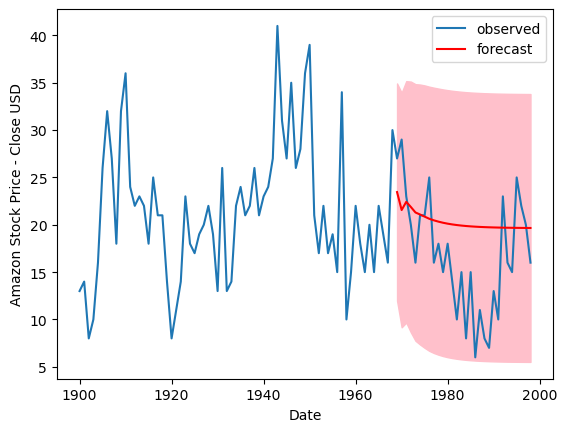

In [42]:
 # plot the amazon data
plt.plot(earthquakes.index, earthquakes, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [43]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Thu, 20 Apr 2023   AIC                          11076.743
Time:                        00:38:23   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9873      0.459     -2.151      0.031      -1.887      -0.088
ar.L1         -0.1542      0.078     -1.988      0.047      -0.306      -0.002
ar.L2          0.7944      0.080      9.960      0.0

In [44]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    358.768019
1259    358.147337
1260    356.218012
1261    355.667190
1262    353.864253
1263    353.349441
1264    351.641354
1265    351.140526
1266    349.505631
1267    349.004627
Name: predicted_mean, dtype: float64


In [45]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

1259    360.000772
1260    360.587970
1261    359.812551
1262    360.403539
1263    359.699896
1264    360.281083
1265    359.634608
1266    360.198089
1267    359.598905
1268    360.140325
Name: predicted_mean, dtype: float64


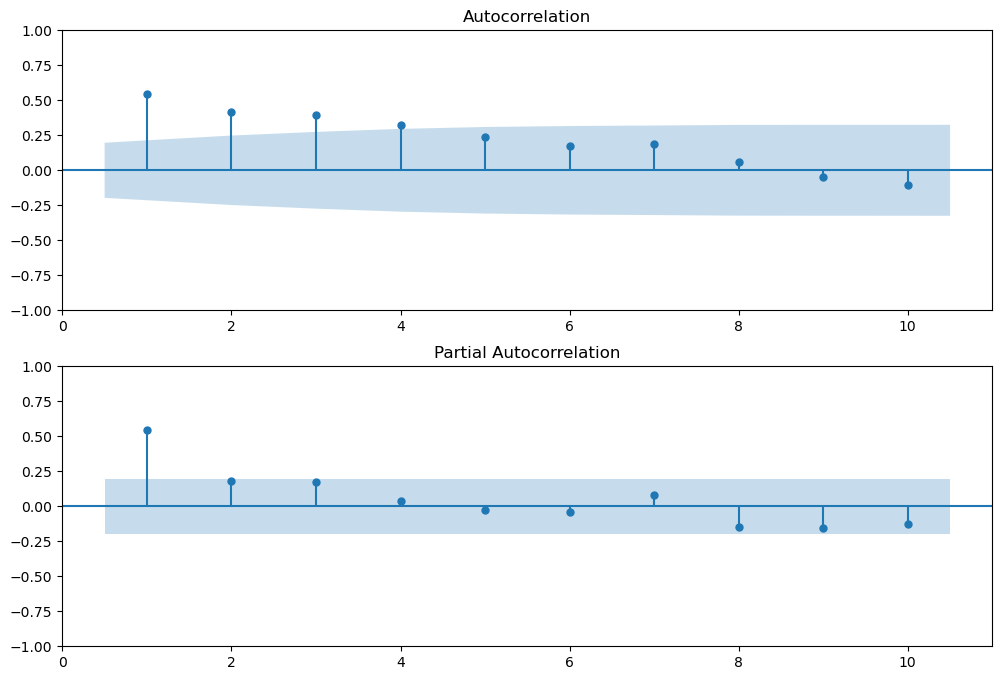

In [46]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquakes, lags=10, zero=False, ax=ax1)
plot_pacf(earthquakes, lags=10, zero=False, ax=ax2)
plt.show()

In [47]:
# Instantiate model
model = ARIMA(earthquakes, order=(1,0,0))

# Train model
results = model.fit()

print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(1, 0, 0)   Log Likelihood                -318.984
Date:                  Thu, 20 Apr 2023   AIC                            643.968
Time:                          00:38:26   BIC                            651.753
Sample:                      01-01-1900   HQIC                           647.118
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8906      1.420     14.004      0.000      17.107      22.674
ar.L1          0.5433      0.078      6.930      0.000       0.390       0.697
sigma2        36.6976      4.832    

In [48]:
# Searching over model orders

# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquakes, order=(p,0,q))
            results = model.fit()
            
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
            
        except:
            order_aic_bic.append((p,q,None, None))
        
        
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'),'\n')

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
4  1  1  640.456284  650.836763
5  1  2  642.380867  655.356467
8  2  2  642.468590  658.039309
6  2  0  642.733854  653.114333
3  1  0  643.967677  651.753037
7  2  1  647.440664  660.416263
2  0  2  651.733227  662.113706
1  0  1  654.846859  662.632218
0  0  0  676.544359  681.734599 

   p  q         AIC         BIC
4  1  1  640.456284  650.836763
3  1  0  643.967677  651.753037
6  2  0  642.733854  653.114333
5  1  2  642.380867  655.356467
8  2  2  642.468590  658.039309
7  2  1  647.440664  660.416263
2  0  2  651.733227  662.113706
1  0  1  654.846859  662.632218
0  0  0  676.544359  681.734599


### Model Diagnostics

An important metric we can use to check the quality of our model is the Mean Absolute Error (MAE) which is the average of the absolute values of the errors. The lower the MAE the better the model is. This is essentially the difference between the predicted value and the actual value. The MAE is calculated as follows:

$$\begin{align} MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i| \end{align}$$

where $y_i$ is the actual value and $\hat{y}_i$ is the predicted value

For our earthquake model based on the summary we can note the following

1. Prob(Q) is 0.33 which is greater than 0.05 so we can say that the residuals are not correlated with each other
2. Prob(JB) is 0.13 which is greater than 0.05 so we can say that the residuals are normally distributed

4.449310777981872


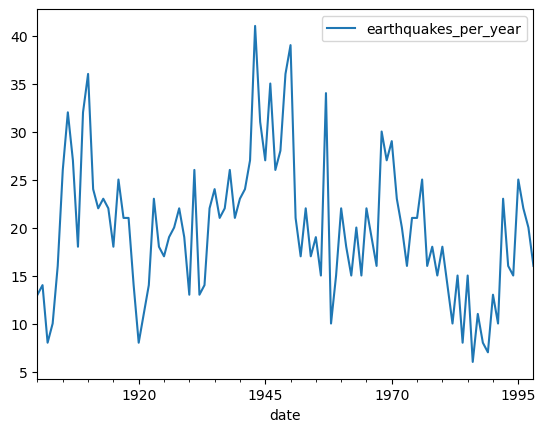

In [49]:
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquakes.plot()
plt.show()

### Box-Jenkins Method

The Box-Jenkins method helps us to create a model for a timeseries. It is a systematic approach to time series forecasting. It is a 3 step process

1. Identification of the model
2. Estimation of the model
3. Diagnostic checking

#### Identification of the model 

* Is the time series stationary?
* What differencing will make it stationary?
* What transforms will make it stationary?
* What values of p and q are most promising?

#### Estimation of the model

* Fitting the model to the data
* Check model aic and bic values

#### Diagnostic checking

* Model summary and diagnostic plots

### Factors in ARIMA Model

Other factors that may be present in the timeseries are seasonality and trend. Seasonality is the periodicity in the timeseries. Trend is the upward or downward movement in the timeseries. These factors can be removed by differencing the timeseries.

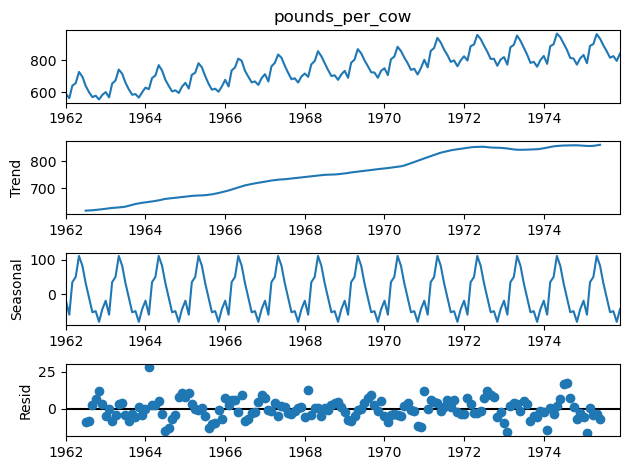

In [55]:
# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

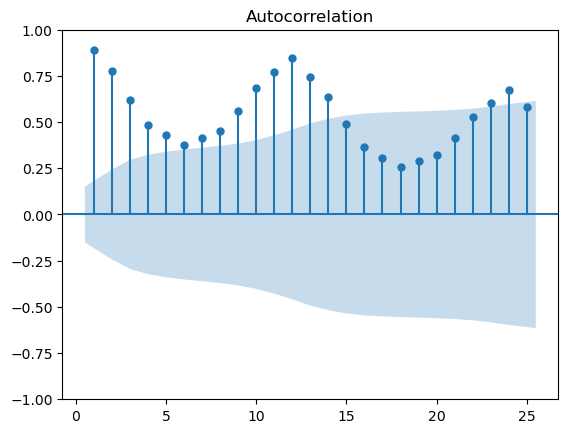

In [56]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(milk_production['pounds_per_cow'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

### SARIMA Model

SARIMA or Seasonal ARIMA is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality. The equation for SARIMA is as follows:

$$\begin{align} y_t &= c + \epsilon_t + \sum_{i=1}^{p} \phi_i \epsilon_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \sum_{k=1}^{P} \Phi_k y_{t-k} + \sum_{l=1}^{Q} \Theta_l y_{t-l} \\ \epsilon_t &\sim N(0,100) \end{align}$$

where $p$ is the order of the AR term, $q$ is the order of the MA term, $P$ is the order of the seasonal AR term, $Q$ is the order of the seasonal MA term and $d$ is the number of nonseasonal differences needed for stationarity

In [ ]:
model = SARIMA(milk_production, order)

### Automation and Savings